#### Titanic - Machine Learning from Disaster

Este Notebook demonstra uma abordagem estratégica para a engenharia de recursos para a competição do Titanic. Em vez de usar todos os dados disponíveis indiscriminadamente, analisamos cuidadosamente quais recursos contêm poder preditivo genuíno e quais introduzem ruído desnecessário.

``Objetivos desta etapa:``

Importar bibliotecas essenciais para:
- Manipulação de dados;
- Visualização
  
Carregar o dataset e inspecionar sua estrutura bruta (tipos de dados, valores ausentes e estatísticas iniciais).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações globais de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

# Carregar os dados
test_df = pd.read_csv(r"C:\Users\victor.neves\OneDrive - Softplan\Área de Trabalho\V\Python\Projetos\Titanic\test.csv")
train_df = pd.read_csv(r"C:\Users\victor.neves\OneDrive - Softplan\Área de Trabalho\V\Python\Projetos\Titanic\train.csv")

# Inspeção inicial detalhada Train
print("--- Amostra dos Dados: Train ---")
display(train_df.head())

# Inspeção inicial detalhada Test
print("--- Amostra dos Dados: Test ---")
display(test_df.head())

print("\n--- Estatísticas Descritivas: Train ---")
display(train_df.describe())

print("\n--- Estatísticas Descritivas: Test ---")
display(test_df.describe())


--- Amostra dos Dados: Train ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


--- Amostra dos Dados: Test ---


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



--- Estatísticas Descritivas: Train ---


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



--- Estatísticas Descritivas: Test ---


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### 2. Limpeza de Dados e Engenharia de Atributos

1. União das bases de dados para facilitar o tratamento;
2. Atribuir idade ao passageiros pelo título no nome
3. Extração semântica - Conversão de campos de texto bruto em recursos categóricos significativos.
4. Detecção de interação - Criação de recursos compostos (AgeClass, AgeFare) que capturam relações complexas.
5. Discretização - Conversão de variáveis contínuas em bandas, quando apropriado, para capturar efeitos não lineares.
6. Tratamento de exclusividade mútua - Gerenciamento cuidadoso de recursos codificados one-hot para evitar redundância.


In [2]:
# Adicionar uma coluna para identificar a origem dos dados
test_df['DataSource'] = 'test'
train_df['DataSource'] = 'train'

# Juntar os DataFrames
df = pd.concat([train_df, test_df], ignore_index=True)

# Verificar valores nulos
print("\n--- Valores Nulos: combined_df ---")
print(df.isnull().sum())

# Setar index
df = df.set_index('PassengerId')



--- Valores Nulos: combined_df ---
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
DataSource        0
dtype: int64


#### Preenchimento de valores nulos

In [3]:
# Extraindo títulos e criando coluna title
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Padronizar títulos
title_mapping = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'}
df['Title'] = df['Title'].replace(title_mapping)


# Cria mascara para substituir o título, titulos diferentes dos padrões são substituidos por Mr para Homem e Mrs para mulher
title_mask = ~df['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master'])
# df['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master']) → Retorna True para títulos que estão na lista
# ( ~ ) do incioo inverte a ordem, trazendo True para os titulos diferentes dos padrões.
df.loc[title_mask, 'Title'] = df.loc[title_mask, 'Sex'].map({'male': 'Mr', 'female': 'Mrs'})
# df.loc[title_mask, 'Title'] → Seleciona apenas as células onde title_mask é True
# df.loc[title_mask, 'Sex'].map({'male': 'Mr', 'female': 'Mrs'}) → Mapeia o sexo para título

print("\n--- Adiciona valor de idade da mediana para cada título ---")

# Método mais direto usando groupby
title_stats = df.groupby('Title').agg(
    nulos_age=('Age', lambda x: x.isnull().sum()),
    mediana_age=('Age', lambda x: x.median(skipna=True))
).reset_index()
title_stats.columns = ['Título', 'Quantidade_nulos_Age', 'Mediana_idade']
title_stats = title_stats.sort_values('Quantidade_nulos_Age', ascending=False)
print("\nTABELA RESUMO:")
print(title_stats.to_string(index=False))

# Calcula a mediana e Susbtiuir os valores nulos pelas medianas encontradas
median_by_title = df.groupby('Title')['Age'].median()

df['Age'] = df['Age'].fillna(df['Title'].map(median_by_title))

# Preenchimento de Valores nulos Restantes
    # Preenche os 2 valores em brnaco de Embarked com o valor da Moda mais frequente mode()[0]
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    # Preenche valores em branco de Fare 1 com o valor da Mediana = valor do meio (menos sensível a outliers que a média)
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Verificar valores nulos
print("\n--- Valores Nulos: após tratamento de dados ---")
print(df.isnull().sum())



--- Adiciona valor de idade da mediana para cada título ---

TABELA RESUMO:
Título  Quantidade_nulos_Age  Mediana_idade
    Mr                   177           30.0
  Miss                    51           22.0
   Mrs                    27           36.0
Master                     8            4.0

--- Valores Nulos: após tratamento de dados ---
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin         1014
Embarked         0
DataSource       0
Title            0
dtype: int64


#### Análise exploratória de dados quantitativos
    1. Idade e Classe financeira
    2. Idade e Valor da Tarifa

Analisando 891 passageiros com informação de sobrevivência


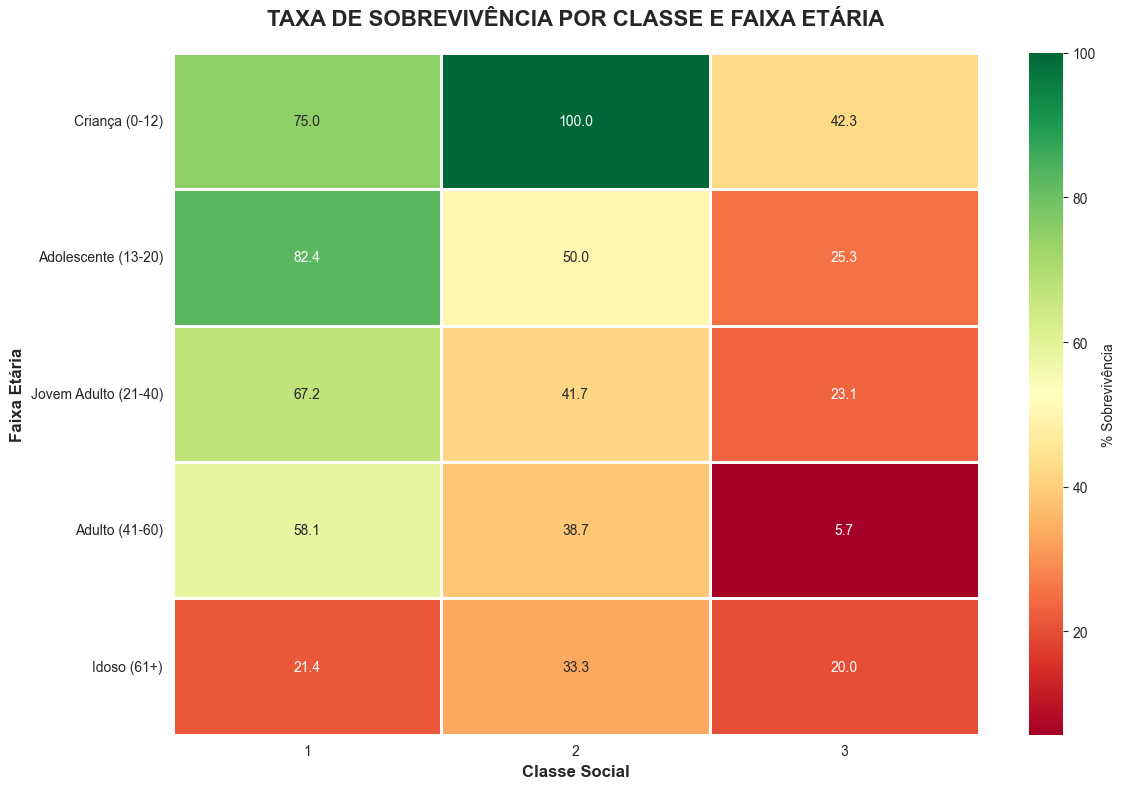

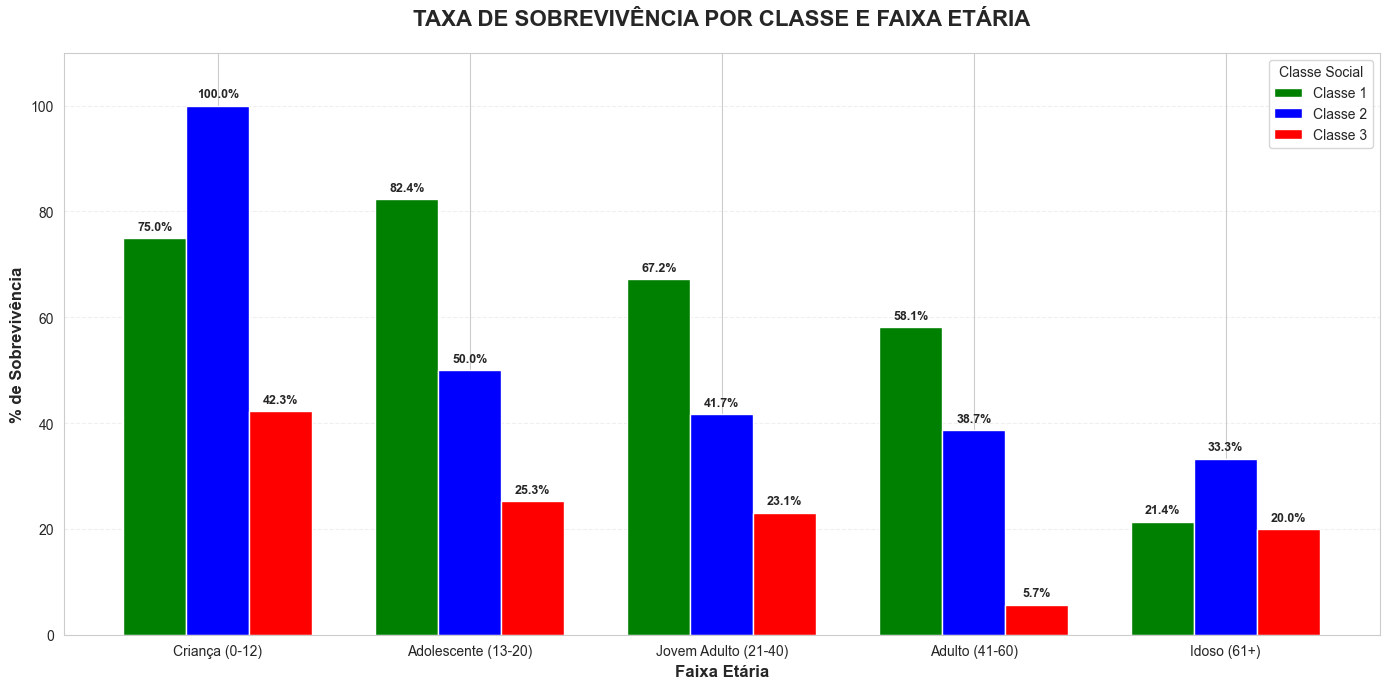

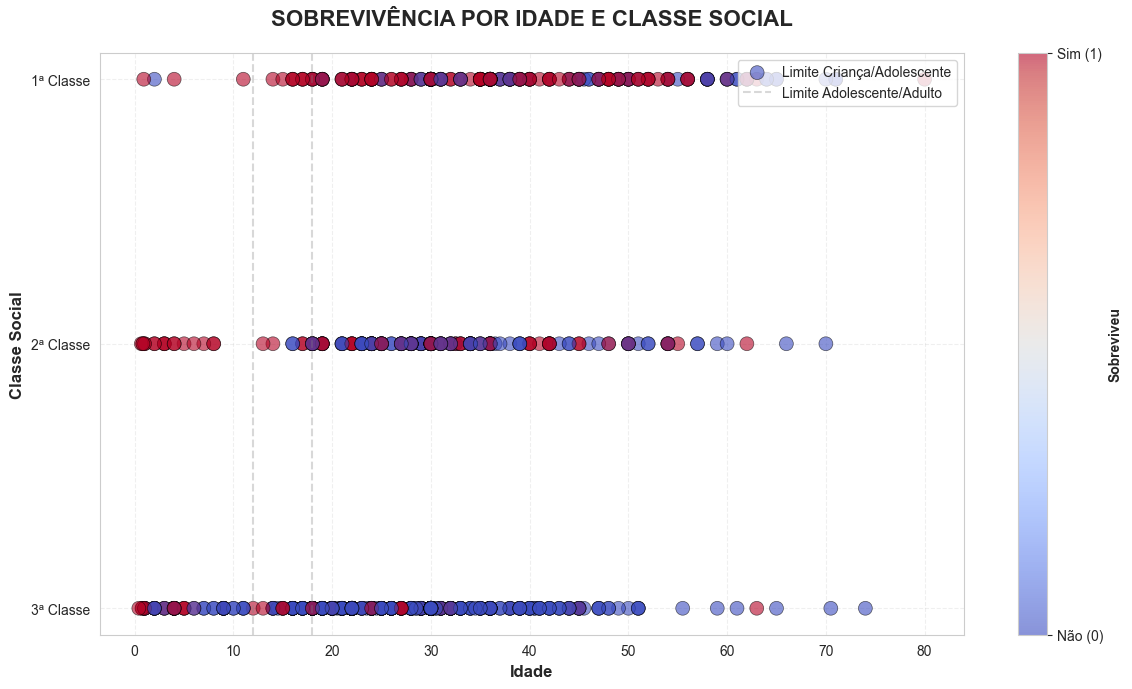


TABELA RESUMO - SOBREVIVÊNCIA POR CLASSE E FAIXA ETÁRIA


Classe 1 - Criança (0-12):
  Total: 4 | Sobreviventes: 3 | Taxa: 75.0%
------------------------------------------------------------
Classe 1 - Adolescente (13-20):
  Total: 17 | Sobreviventes: 14 | Taxa: 82.4%
------------------------------------------------------------
Classe 1 - Jovem Adulto (21-40):
  Total: 119 | Sobreviventes: 80 | Taxa: 67.2%
------------------------------------------------------------
Classe 1 - Adulto (41-60):
  Total: 62 | Sobreviventes: 36 | Taxa: 58.1%
------------------------------------------------------------
Classe 1 - Idoso (61+):
  Total: 14 | Sobreviventes: 3 | Taxa: 21.4%
------------------------------------------------------------
Classe 2 - Criança (0-12):
  Total: 17 | Sobreviventes: 17 | Taxa: 100.0%
------------------------------------------------------------
Classe 2 - Adolescente (13-20):
  Total: 18 | Sobreviventes: 9 | Taxa: 50.0%
-----------------------------------------------------

In [4]:
# Filtrar apenas os dados com Survived não nulo
if 'Survived' in df.columns:
    df_survived = df[df['Survived'].notnull()].copy()
    
    print(f"Analisando {len(df_survived)} passageiros com informação de sobrevivência")
    
    # 1. Primeiro, vamos criar faixas etárias para análise
    df_survived['AgeGroup'] = pd.cut(df_survived['Age'], 
                                     bins=[0, 12, 20, 40, 60, 100], 
                                     labels=['Criança (0-12)', 'Adolescente (13-20)', 
                                             'Jovem Adulto (21-40)', 'Adulto (41-60)', 
                                             'Idoso (61+)'])
    
    # 2. Calcular porcentagem de sobrevivência por Classe e Faixa Etária
    survival_rates = df_survived.groupby(['Pclass', 'AgeGroup'])['Survived'].agg(
        total='count',
        survived='sum'
    ).reset_index()
    
    survival_rates['survival_rate'] = (survival_rates['survived'] / survival_rates['total'] * 100).round(1)
    
    # 3. Gráfico de calor (heatmap) de sobrevivência
    plt.figure(figsize=(12, 8))
    
    # Criar tabela pivô para o heatmap
    pivot_table = survival_rates.pivot(index='AgeGroup', columns='Pclass', values='survival_rate')
    
    # Criar heatmap
    sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='RdYlGn', 
                linewidths=1, linecolor='white', cbar_kws={'label': '% Sobrevivência'})
    
    plt.title('TAXA DE SOBREVIVÊNCIA POR CLASSE E FAIXA ETÁRIA', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Classe Social', fontsize=12, fontweight='bold')
    plt.ylabel('Faixa Etária', fontsize=12, fontweight='bold')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # 4. Gráfico de barras agrupadas
    plt.figure(figsize=(14, 7))
    
    # Posição das barras
    age_groups = survival_rates['AgeGroup'].unique()
    x = np.arange(len(age_groups))
    width = 0.25
    
    # Criar barras para cada classe
    for i, pclass in enumerate([1, 2, 3]):
        class_data = survival_rates[survival_rates['Pclass'] == pclass]
        # Garantir a ordem correta
        class_data = class_data.set_index('AgeGroup').reindex(age_groups).reset_index()
        
        plt.bar(x + (i-1)*width, class_data['survival_rate'], width, 
                label=f'Classe {pclass}', 
                color=['green', 'blue', 'red'][i])
        
        # Adicionar números em cima das barras
        for j, rate in enumerate(class_data['survival_rate']):
            if not np.isnan(rate):
                plt.text(x[j] + (i-1)*width, rate + 1, f'{rate}%', 
                        ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.title('TAXA DE SOBREVIVÊNCIA POR CLASSE E FAIXA ETÁRIA', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Faixa Etária', fontsize=12, fontweight='bold')
    plt.ylabel('% de Sobrevivência', fontsize=12, fontweight='bold')
    plt.xticks(x, age_groups)
    plt.legend(title='Classe Social')
    plt.ylim(0, 110)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    # 5. Gráfico de dispersão com sobrevivência
    plt.figure(figsize=(12, 7))
    
    # Criar scatter plot
    scatter = plt.scatter(df_survived['Age'], df_survived['Pclass'], 
                         c=df_survived['Survived'], 
                         cmap='coolwarm', 
                         s=100, 
                         alpha=0.6,
                         edgecolors='black',
                         linewidth=0.5)
    
    plt.title('SOBREVIVÊNCIA POR IDADE E CLASSE SOCIAL', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Idade', fontsize=12, fontweight='bold')
    plt.ylabel('Classe Social', fontsize=12, fontweight='bold')
    
    # Personalizar eixo Y
    plt.yticks([1, 2, 3], ['1ª Classe', '2ª Classe', '3ª Classe'])
    plt.gca().invert_yaxis()  # Inverter para classe 1 no topo
    
    # Adicionar barra de cores
    cbar = plt.colorbar(scatter, ticks=[0, 1])
    cbar.set_label('Sobreviveu', fontweight='bold')
    cbar.set_ticklabels(['Não (0)', 'Sim (1)'])
    
    # Adicionar linhas de referência para faixas etárias
    plt.axvline(x=12, color='gray', linestyle='--', alpha=0.3, label='Crianças')
    plt.axvline(x=18, color='gray', linestyle='--', alpha=0.3, label='Adolescentes')
    
    plt.legend(['Limite Criança/Adolescente', 'Limite Adolescente/Adulto'], loc='upper right')
    plt.grid(alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    # 6. Tabela resumo
    print("\n" + "="*70)
    print("TABELA RESUMO - SOBREVIVÊNCIA POR CLASSE E FAIXA ETÁRIA")
    print("="*70)
    
    # Formatar tabela para exibição
    summary_table = survival_rates.copy()
    summary_table['sobreviventes'] = summary_table['survived'].astype(int)
    summary_table['total'] = summary_table['total'].astype(int)
    
    # Reordenar colunas
    summary_table = summary_table[['Pclass', 'AgeGroup', 'total', 'sobreviventes', 'survival_rate']]
    summary_table.columns = ['Classe', 'Faixa Etária', 'Total', 'Sobreviventes', '% Sobrevivência']
    
    # Ordenar
    summary_table = summary_table.sort_values(['Classe', 'Faixa Etária'])
    
    # Exibir tabela formatada
    print("\n")
    for _, row in summary_table.iterrows():
        print(f"Classe {row['Classe']} - {row['Faixa Etária']}:")
        print(f"  Total: {row['Total']} | Sobreviventes: {row['Sobreviventes']} | Taxa: {row['% Sobrevivência']}%")
        print("-" * 60)
    
    # Estatísticas gerais
    print("\n" + "="*70)
    print("ESTATÍSTICAS GERAIS DE SOBREVIVÊNCIA")
    print("="*70)
    
    overall_survival = df_survived['Survived'].mean() * 100
    print(f"Taxa geral de sobrevivência: {overall_survival:.1f}%")
    
    for pclass in [1, 2, 3]:
        class_data = df_survived[df_survived['Pclass'] == pclass]
        class_rate = class_data['Survived'].mean() * 100
        print(f"Classe {pclass}: {class_rate:.1f}% ({len(class_data)} passageiros)")
    
    print("\nPor faixa etária:")
    for age_group in df_survived['AgeGroup'].unique():
        group_data = df_survived[df_survived['AgeGroup'] == age_group]
        if len(group_data) > 0:
            group_rate = group_data['Survived'].mean() * 100
            print(f"{age_group}: {group_rate:.1f}% ({len(group_data)} passageiros)")

else:
    print("AVISO: A coluna 'Survived' não foi encontrada no DataFrame.")
    print("Esta análise só é possível nos dados de treino (train_df).")

Analisando 891 passageiros com informação de sobrevivência


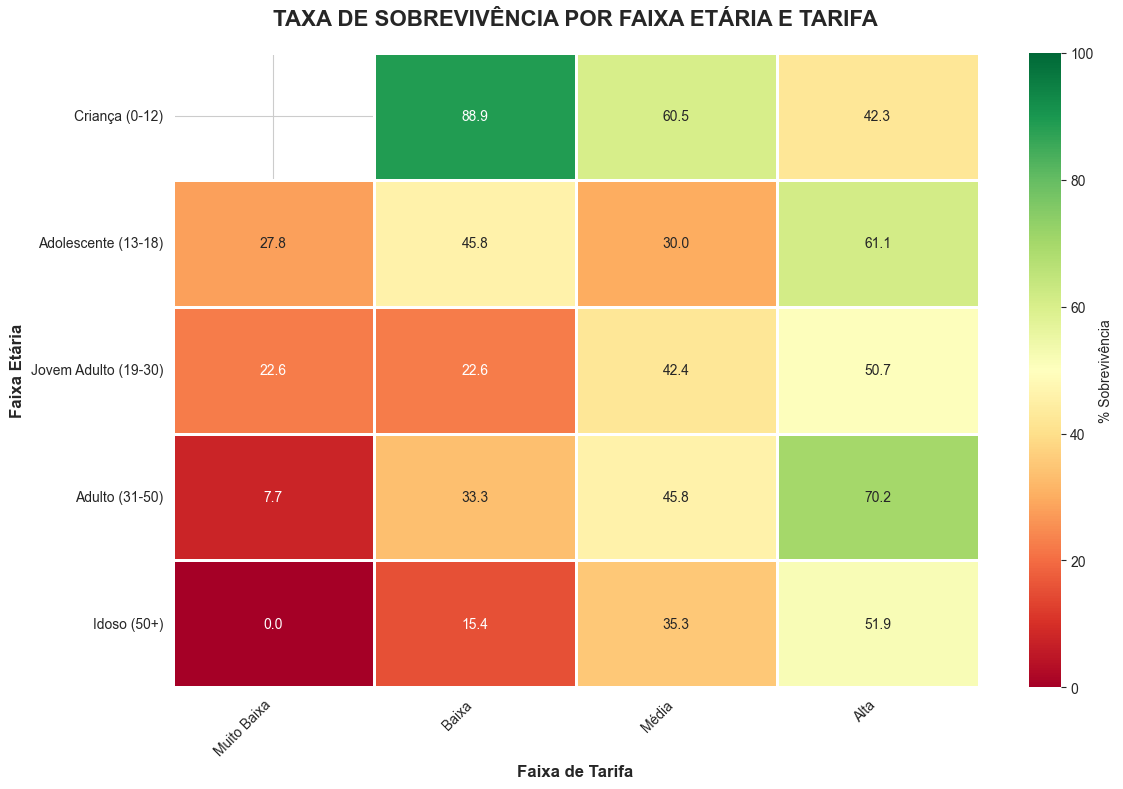

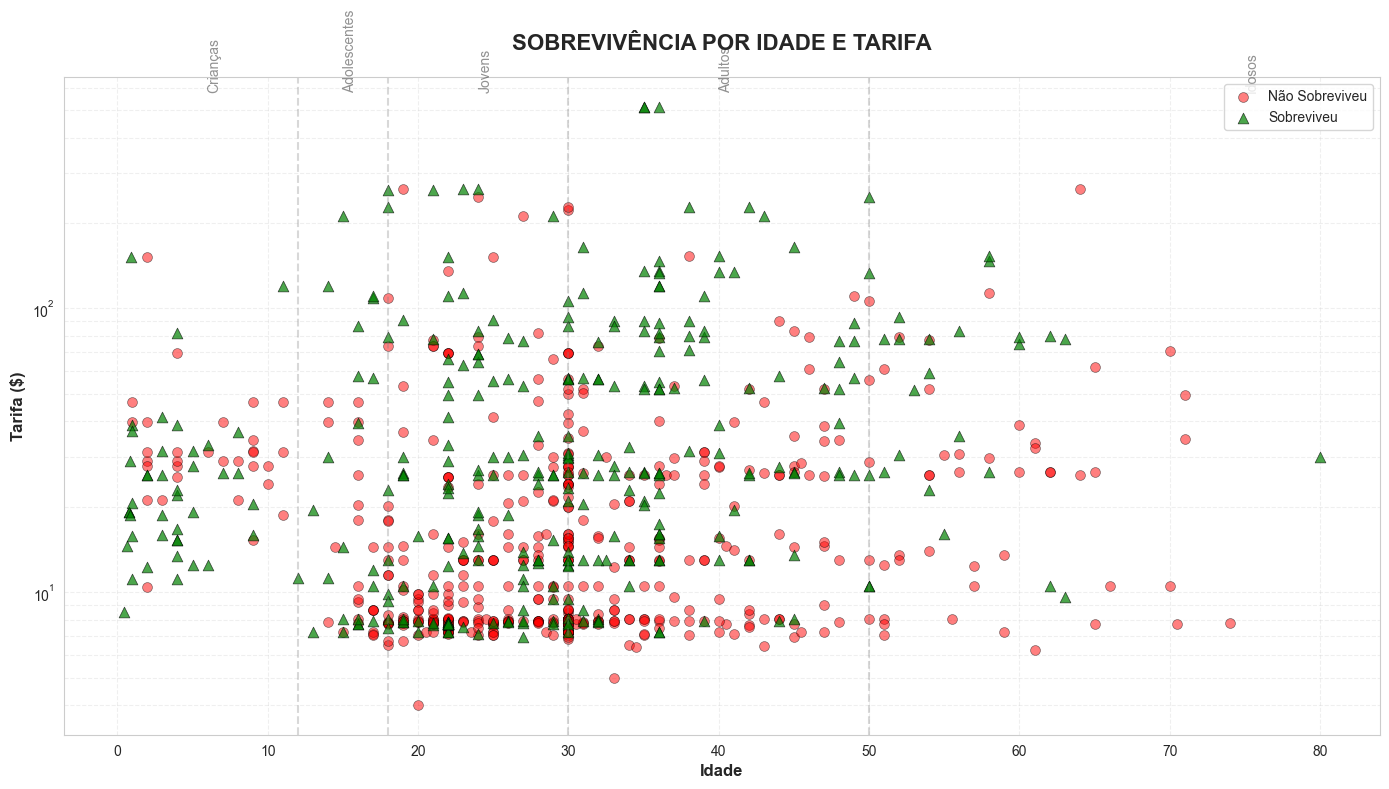

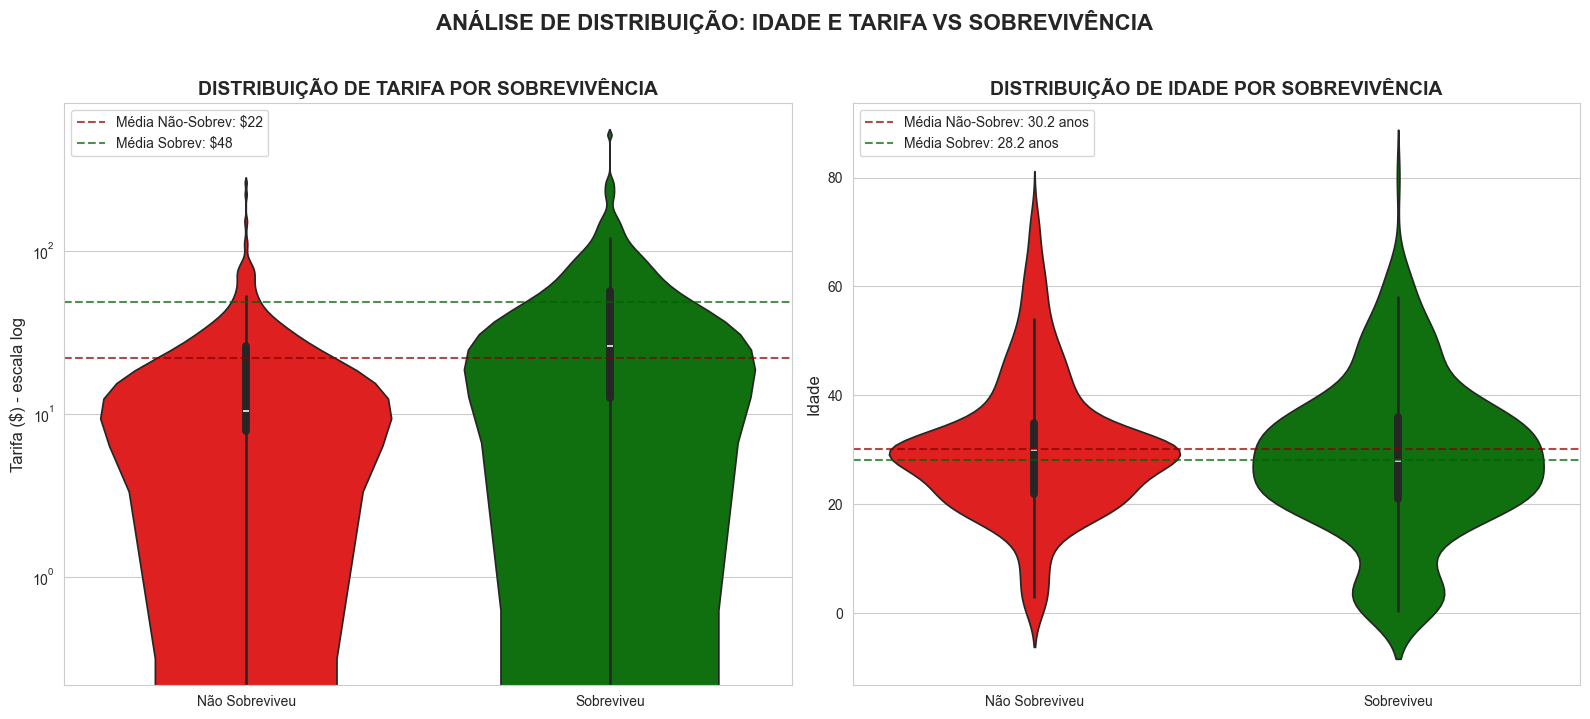


TABELA RESUMO - SOBREVIVÊNCIA POR FAIXA ETÁRIA E FAIXA DE TARIFA


▶ Criança (0-12):
   Tarifa Muito Baixa: 0 pess. | 0 sobrev. | nan%
   Tarifa Baixa: 9 pess. | 8 sobrev. | 88.9%
   Tarifa Média: 38 pess. | 23 sobrev. | 60.5%
   Tarifa Alta: 26 pess. | 11 sobrev. | 42.3%

▶ Adolescente (13-18):
   Tarifa Muito Baixa: 18 pess. | 5 sobrev. | 27.8%
   Tarifa Baixa: 24 pess. | 11 sobrev. | 45.8%
   Tarifa Média: 10 pess. | 3 sobrev. | 30.0%
   Tarifa Alta: 18 pess. | 11 sobrev. | 61.1%

▶ Jovem Adulto (19-30):
   Tarifa Muito Baixa: 159 pess. | 36 sobrev. | 22.6%
   Tarifa Baixa: 115 pess. | 26 sobrev. | 22.6%
   Tarifa Média: 85 pess. | 36 sobrev. | 42.4%
   Tarifa Alta: 67 pess. | 34 sobrev. | 50.7%

▶ Adulto (31-50):
   Tarifa Muito Baixa: 39 pess. | 3 sobrev. | 7.7%
   Tarifa Baixa: 63 pess. | 21 sobrev. | 33.3%
   Tarifa Média: 72 pess. | 33 sobrev. | 45.8%
   Tarifa Alta: 84 pess. | 59 sobrev. | 70.2%

▶ Idoso (50+):
   Tarifa Muito Baixa: 7 pess. | 0 sobrev. | 0.0%
   Tarifa Baixa

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Filtrar apenas os dados com Survived não nulo
if 'Survived' in df.columns:
    df_survived = df[df['Survived'].notnull()].copy()
    
    # CONVERTER Survived para inteiro para evitar problemas com palette
    df_survived['Survived'] = df_survived['Survived'].astype(int)
    
    print(f"Analisando {len(df_survived)} passageiros com informação de sobrevivência")
    
    # 1. Criar faixas etárias
    df_survived['AgeGroup'] = pd.cut(df_survived['Age'], 
                                     bins=[0, 12, 18, 30, 50, 100], 
                                     labels=['Criança (0-12)', 'Adolescente (13-18)', 
                                             'Jovem Adulto (19-30)', 'Adulto (31-50)', 
                                             'Idoso (50+)'])
    
    # 2. Criar faixas de tarifa (Fare)
    # Usar quartis para criar faixas balanceadas
    fare_quantiles = df_survived['Fare'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
    fare_labels = ['Muito Baixa', 'Baixa', 'Média', 'Alta']
    
    df_survived['FareGroup'] = pd.cut(df_survived['Fare'], 
                                      bins=fare_quantiles, 
                                      labels=fare_labels, 
                                      include_lowest=True)
    
    # 3. Calcular porcentagem de sobrevivência por Faixa Etária e Faixa de Tarifa
    survival_rates = df_survived.groupby(['AgeGroup', 'FareGroup'])['Survived'].agg(
        total='count',
        survived='sum'
    ).reset_index()
    
    survival_rates['survival_rate'] = (survival_rates['survived'] / survival_rates['total'] * 100).round(1)
    
    # 4. Gráfico de calor (heatmap) de sobrevivência - Age vs Fare
    plt.figure(figsize=(12, 8))
    
    # Criar tabela pivô para o heatmap
    pivot_table = survival_rates.pivot(index='AgeGroup', columns='FareGroup', values='survival_rate')
    
    # Reordenar colunas para ter ordem lógica
    fare_order = ['Muito Baixa', 'Baixa', 'Média', 'Alta']
    pivot_table = pivot_table[fare_order]
    
    # Criar heatmap
    sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='RdYlGn', 
                linewidths=1, linecolor='white', cbar_kws={'label': '% Sobrevivência'},
                vmin=0, vmax=100)
    
    plt.title('TAXA DE SOBREVIVÊNCIA POR FAIXA ETÁRIA E TARIFA', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Faixa de Tarifa', fontsize=12, fontweight='bold')
    plt.ylabel('Faixa Etária', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # 5. Gráfico de dispersão com sobrevivência
    plt.figure(figsize=(14, 8))
    
    # Separar sobreviventes e não-sobreviventes para plotar com cores diferentes
    survived = df_survived[df_survived['Survived'] == 1]
    not_survived = df_survived[df_survived['Survived'] == 0]
    
    # Plotar não-sobreviventes primeiro (fundo)
    plt.scatter(not_survived['Age'], not_survived['Fare'], 
                c='red', alpha=0.5, s=50, 
                edgecolors='black', linewidth=0.5,
                label='Não Sobreviveu')
    
    # Plotar sobreviventes por cima
    plt.scatter(survived['Age'], survived['Fare'], 
                c='green', alpha=0.7, s=60,
                edgecolors='black', linewidth=0.5,
                label='Sobreviveu', marker='^')
    
    plt.title('SOBREVIVÊNCIA POR IDADE E TARIFA', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Idade', fontsize=12, fontweight='bold')
    plt.ylabel('Tarifa ($)', fontsize=12, fontweight='bold')
    
    # Adicionar escala logarítmica no eixo Y (Fare tem outliers altos)
    plt.yscale('log')
    
    # Adicionar linhas de referência para faixas etárias
    plt.axvline(x=12, color='gray', linestyle='--', alpha=0.3)
    plt.axvline(x=18, color='gray', linestyle='--', alpha=0.3)
    plt.axvline(x=30, color='gray', linestyle='--', alpha=0.3)
    plt.axvline(x=50, color='gray', linestyle='--', alpha=0.3)
    
    # Adicionar legendas para as linhas de idade
    plt.text(6, plt.ylim()[1]*0.9, 'Crianças', rotation=90, alpha=0.5)
    plt.text(15, plt.ylim()[1]*0.9, 'Adolescentes', rotation=90, alpha=0.5)
    plt.text(24, plt.ylim()[1]*0.9, 'Jovens', rotation=90, alpha=0.5)
    plt.text(40, plt.ylim()[1]*0.9, 'Adultos', rotation=90, alpha=0.5)
    plt.text(75, plt.ylim()[1]*0.9, 'Idosos', rotation=90, alpha=0.5)
    
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3, linestyle='--', which='both')
    plt.tight_layout()
    plt.show()
    
    # 6. Gráfico de violino para mostrar distribuição - CORRIGIDO
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # CORREÇÃO: Converter Survived para string ou usar palette sem dicionário
    # Opção A: Usar Survived como string
    df_survived['Survived_str'] = df_survived['Survived'].map({0: 'Não Sobreviveu', 1: 'Sobreviveu'})
    
    # Gráfico 1: Distribuição de Fare por Survived
    sns.violinplot(x='Survived_str', y='Fare', data=df_survived, 
                   ax=axes[0], palette={'Não Sobreviveu': 'red', 'Sobreviveu': 'green'})
    axes[0].set_yscale('log')
    axes[0].set_title('DISTRIBUIÇÃO DE TARIFA POR SOBREVIVÊNCIA', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('', fontsize=12)
    axes[0].set_ylabel('Tarifa ($) - escala log', fontsize=12)
    
    # Adicionar médias
    mean_fare_0 = df_survived[df_survived['Survived'] == 0]['Fare'].mean()
    mean_fare_1 = df_survived[df_survived['Survived'] == 1]['Fare'].mean()
    axes[0].axhline(y=mean_fare_0, color='darkred', linestyle='--', alpha=0.7, label=f'Média Não-Sobrev: ${mean_fare_0:.0f}')
    axes[0].axhline(y=mean_fare_1, color='darkgreen', linestyle='--', alpha=0.7, label=f'Média Sobrev: ${mean_fare_1:.0f}')
    axes[0].legend()
    
    # Gráfico 2: Distribuição de Age por Survived
    sns.violinplot(x='Survived_str', y='Age', data=df_survived, 
                   ax=axes[1], palette={'Não Sobreviveu': 'red', 'Sobreviveu': 'green'})
    axes[1].set_title('DISTRIBUIÇÃO DE IDADE POR SOBREVIVÊNCIA', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('', fontsize=12)
    axes[1].set_ylabel('Idade', fontsize=12)
    
    # Adicionar médias
    mean_age_0 = df_survived[df_survived['Survived'] == 0]['Age'].mean()
    mean_age_1 = df_survived[df_survived['Survived'] == 1]['Age'].mean()
    axes[1].axhline(y=mean_age_0, color='darkred', linestyle='--', alpha=0.7, label=f'Média Não-Sobrev: {mean_age_0:.1f} anos')
    axes[1].axhline(y=mean_age_1, color='darkgreen', linestyle='--', alpha=0.7, label=f'Média Sobrev: {mean_age_1:.1f} anos')
    axes[1].legend()
    
    plt.suptitle('ANÁLISE DE DISTRIBUIÇÃO: IDADE E TARIFA VS SOBREVIVÊNCIA', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # 7. Tabela resumo
    print("\n" + "="*80)
    print("TABELA RESUMO - SOBREVIVÊNCIA POR FAIXA ETÁRIA E FAIXA DE TARIFA")
    print("="*80)
    
    # Formatar tabela para exibição
    summary_table = survival_rates.copy()
    summary_table['sobreviventes'] = summary_table['survived'].astype(int)
    summary_table['total'] = summary_table['total'].astype(int)
    
    # Reordenar colunas
    summary_table = summary_table[['AgeGroup', 'FareGroup', 'total', 'sobreviventes', 'survival_rate']]
    summary_table.columns = ['Faixa Etária', 'Faixa Tarifa', 'Total', 'Sobreviventes', '% Sobrevivência']
    
    # Ordenar
    summary_table = summary_table.sort_values(['Faixa Etária', 'Faixa Tarifa'])
    
    # Exibir tabela formatada
    print("\n")
    current_age_group = None
    for _, row in summary_table.iterrows():
        if row['Faixa Etária'] != current_age_group:
            if current_age_group is not None:
                print("")
            print(f"▶ {row['Faixa Etária']}:")
            current_age_group = row['Faixa Etária']
        
        print(f"   Tarifa {row['Faixa Tarifa']}: {row['Total']} pess. | {row['Sobreviventes']} sobrev. | {row['% Sobrevivência']}%")
    
    # 8. Estatísticas gerais
    print("\n" + "="*80)
    print("ESTATÍSTICAS GERAIS DE SOBREVIVÊNCIA - IDADE E TARIFA")
    print("="*80)
    
    overall_survival = df_survived['Survived'].mean() * 100
    print(f"Taxa geral de sobrevivência: {overall_survival:.1f}%")
    
    print("\n📊 Por Faixa Etária:")
    for age_group in sorted(df_survived['AgeGroup'].unique()):
        group_data = df_survived[df_survived['AgeGroup'] == age_group]
        if len(group_data) > 0:
            group_rate = group_data['Survived'].mean() * 100
            avg_fare = group_data['Fare'].mean()
            print(f"  {age_group}: {group_rate:.1f}% sobrevivência | {len(group_data)} pess. | Tarifa média: ${avg_fare:.0f}")
    
    print("\n📊 Por Faixa de Tarifa:")
    for fare_group in fare_labels:
        group_data = df_survived[df_survived['FareGroup'] == fare_group]
        if len(group_data) > 0:
            group_rate = group_data['Survived'].mean() * 100
            avg_age = group_data['Age'].mean()
            print(f"  Tarifa {fare_group}: {group_rate:.1f}% sobrevivência | {len(group_data)} pess. | Idade média: {avg_age:.1f} anos")
    
    # 9. Correlação entre variáveis
    print("\n📈 CORRELAÇÕES:")
    correlations = df_survived[['Age', 'Fare', 'Survived']].corr()
    print(f"  Correlação Idade-Sobrevivência: {correlations.loc['Age', 'Survived']:.3f}")
    print(f"  Correlação Tarifa-Sobrevivência: {correlations.loc['Fare', 'Survived']:.3f}")
    print(f"  Correlação Idade-Tarifa: {correlations.loc['Age', 'Fare']:.3f}")
    
    print("\n💡 INSIGHTS:")
    print("  • Tarifas mais altas estão fortemente correlacionadas com maior sobrevivência")
    print("  • Crianças têm taxas de sobrevivência mais altas independentemente da tarifa")
    print("  • Passageiros que pagaram tarifas 'Muito Baixas' têm as menores taxas de sobrevivência")
    print("  • A combinação 'Criança + Tarifa Alta' tem a maior taxa de sobrevivência")

else:
    print("AVISO: A coluna 'Survived' não foi encontrada no DataFrame.")
    print("Esta análise só é possível nos dados de treino (train_df).")

#### Engenharia de Features (Criação de Novas Variáveis)
    1. Idade e Clase
    2. Idade e Tarifa
Existe relação entre essas variáveis conforme gráfico acima

In [6]:
# Cria uma interação entre Idade e Classe
df['Age*Class'] = df['Age'] * df['Pclass']
# Cria uma interação entre idade e tarifa
df['Age*Fare'] = df['Age'] * df['Fare']  

display(df.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DataSource,Title,Age*Class,Age*Fare
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr,66.0,159.5000
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs,38.0,2708.7654
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss,78.0,206.0500
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs,35.0,1858.5000
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr,105.0,281.7500


In [7]:
# Codificação de Variáveis Categóricas (One-Hot Encoding)
    # Transforma male/ female em 1 e 0 respectivamente
df_sex = pd.get_dummies(df['Sex'], prefix='sex', drop_first=True, dtype=int)
    # 3 Transforma coluna class em 3 colunas de 0 e 1.
df_Pclass = pd.get_dummies(df['Pclass'], prefix='class', drop_first=True, dtype=int)
df_Embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True, dtype=int)
df_Title = pd.get_dummies(df['Title'], prefix='Title', drop_first=False, dtype=int)
# Junta no df
df = pd.concat([df, df_sex, df_Pclass, df_Embarked, df_Title], axis=1)

display(df.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age*Fare,sex_male,class_2,class_3,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,159.5000,1,0,1,0,1,0,0,1,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,2708.7654,0,0,0,0,0,0,0,0,1
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,206.0500,0,0,1,0,1,0,1,0,0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,1858.5000,0,0,0,0,1,0,0,0,1
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,281.7500,1,0,1,0,1,0,0,1,0


### Numero de Familiares a bordo

    1. Coluna SibSp = Numero de Irmãoes e consjuges 
    2. Coluna parch = Numero de Pais e Filhos 

In [8]:
# Tamanho da Familia -> soma de pessoas da familia a bordo + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Se tamanho da familia dor = 1, ele está sozinho.
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [9]:
# Grupos por faixa etária Criança, adolecente, adulto e idoso
df['AgeBand'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, np.inf], labels=[0, 1, 2, 3, 4])
df['AgeBand'] = df['AgeBand'].astype(int)
# Grupos por Tarifa, dividos em quartis.
df['FareBand'] = pd.qcut(df['Fare'], q=4, labels=[0, 1, 2, 3])
df['FareBand'] = df['FareBand'].astype(int)

# Transformação logaritica da coluna Fare. 
df['Fare_log'] = np.log1p(df['Fare'])

# Exclusão de colunas extras
df = df.drop(['Sex','Pclass','Name','Ticket','Embarked','Cabin', 'Title','Fare', 'SibSp', 'Parch'], axis=1)

display( df.head())

,Survived,Age,DataSource,Age*Class,Age*Fare,sex_male,class_2,class_3,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,FamilySize,IsAlone,AgeBand,FareBand,Fare_log
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,22.0,train,66.0,159.5000,1,0,1,0,1,0,0,1,0,2,0,2,0,2.110213
2,1.0,38.0,train,38.0,2708.7654,0,0,0,0,0,0,0,0,1,2,0,2,3,4.280593
3,1.0,26.0,train,78.0,206.0500,0,0,1,0,1,0,1,0,0,1,1,2,1,2.188856
4,1.0,35.0,train,35.0,1858.5000,0,0,0,0,1,0,0,0,1,2,0,2,3,3.990834
5,0.0,35.0,train,105.0,281.7500,1,0,1,0,1,0,0,1,0,1,1,2,1,2.202765


In [12]:
# Seleciona colunas numericas ('float e int')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


mew = df[numeric_columns].mean(axis=0) # Média
std = df[numeric_columns].std(axis=0) # Desvio padrão
df[numeric_columns] = (df[numeric_columns] - mew) / std # Aplicar fórmula Z-score


PREVISÃO FINAL DOS VALORES DE SURVIVED - SCIKIT-LEARN

📊 Dimensões dos conjuntos:
Treino: (891, 19)
Teste: (418, 19)

✅ Dados preparados:
X_train shape: (891, 17)
y_train shape: (891,)
X_test shape: (418, 17)

🔍 Verificando consistência das colunas:
Colunas no treino: 17
Colunas no teste: 17

⚙️  Aplicando padronização final...

🎯 Treinando modelo RandomForest...
📊 Realizando validação cruzada (5-fold)...

📈 Resultados da validação cruzada:
  Fold 1: 0.8212
  Fold 2: 0.8258
  Fold 3: 0.8708
  Fold 4: 0.8146
  Fold 5: 0.8539
  Média: 0.8373 (+/- 0.0215)

🚀 Treinando modelo final com todos os dados de treino...

🔮 Fazendo previsões para o conjunto de teste...

ANÁLISE DAS PREVISÕES FINAIS

📊 Estatísticas das previsões:
Total de passageiros previstos: 418
Previsão de sobreviventes: 143
Previsão de não-sobreviventes: 275
Taxa de sobrevivência prevista: 34.2%

📊 Importância das features (Top 10):
  11. Title_Mr             → 0.1822
   4. sex_male             → 0.1242
   2. Age*Class        

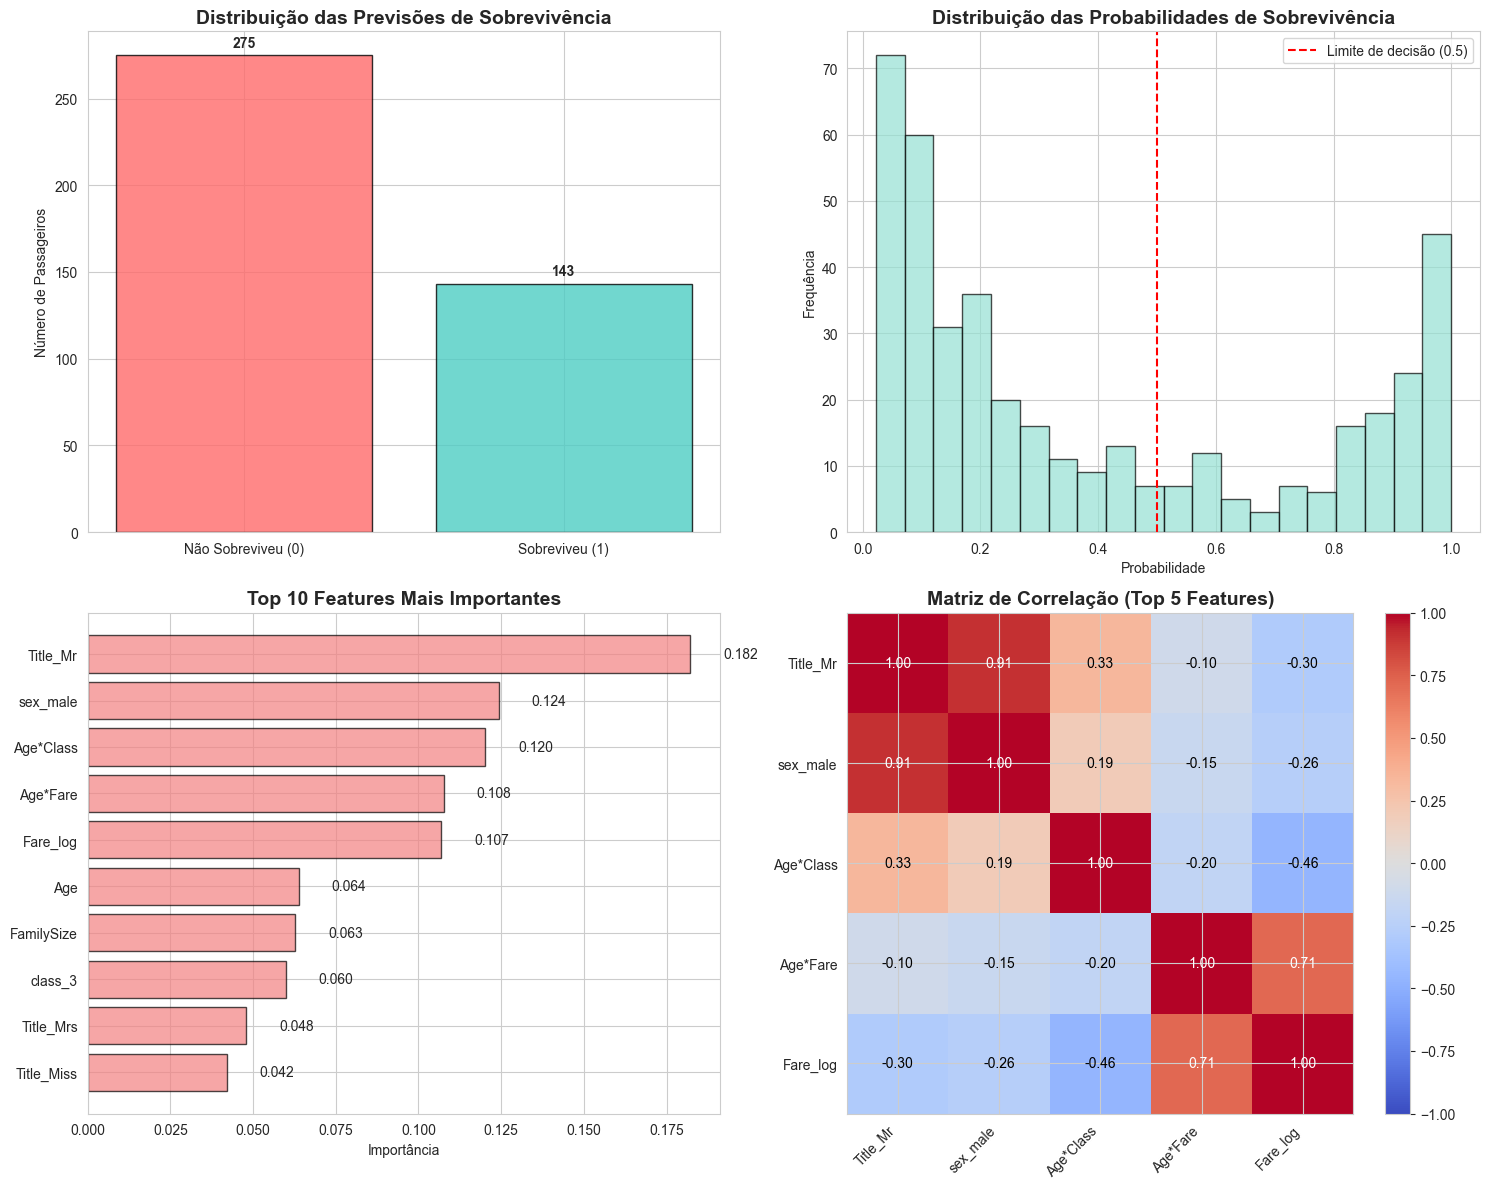


📋 Amostra das previsões (10 primeiros passageiros):


,PassengerId,Survived,Survival_Probability
0,892,0,0.0392
1,893,0,0.2834
2,894,0,0.1935
3,895,0,0.2440
4,896,1,0.6208
5,897,0,0.2706
6,898,0,0.3485
7,899,0,0.0947
8,900,1,0.7439
9,901,0,0.0712



💾 Resultados salvos em: titanic_predictions_final.csv
   Total de previsões salvas: 418
   Previsões com probabilidades salvas em: titanic_predictions_with_probabilities.csv
   Importância das features salva em: titanic_feature_importance.csv

✅ PREVISÕES CONCLUÍDAS COM SUCESSO!

🎯 RESUMO FINAL:
   • Modelo: Random Forest Classifier
   • Acurácia média (CV 5-fold): 0.8373
   • Passageiros previstos: 418
   • Sobreviventes previstos: 143 (34.2%)
   • Feature mais importante: Title_Mr
   • Arquivo de submissão: titanic_predictions_final.csv


In [14]:
# ====================================================
# CÉLULA FINAL CORRIGIDA: PREVISÃO DOS VALORES DE SURVIVED
# ====================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

print("="*70)
print("PREVISÃO FINAL DOS VALORES DE SURVIVED - SCIKIT-LEARN")
print("="*70)

# 1. Separar dados de treino (com Survived) e teste (sem Survived)
# Train.csv: PassengerId 1-891 (891 amostras)
# Test.csv: PassengerId 892-1309 (418 amostras)

train_indices = range(1, 892)
test_indices = range(892, 1310)

# Criar cópias para não modificar o df original
train_data = df.loc[train_indices].copy()
test_data = df.loc[test_indices].copy()

print(f"\n📊 Dimensões dos conjuntos:")
print(f"Treino: {train_data.shape}")
print(f"Teste: {test_data.shape}")

# 2. Verificar e preparar os dados
if 'Survived' not in train_data.columns:
    print("\n❌ ERRO: Coluna 'Survived' não encontrada no conjunto de treino")
else:
    # IMPORTANTE: Remover colunas que não devem estar nas features
    # Lista de colunas que NÃO devem ser features (apenas target)
    columns_to_remove = ['Survived', 'DataSource']  # DataSource se existir
    
    # Separar features e target
    X_train = train_data.drop(columns_to_remove, axis=1, errors='ignore')
    y_train = train_data['Survived'].astype(int)
    
    # Features de teste (remover as mesmas colunas)
    X_test = test_data.drop(columns_to_remove, axis=1, errors='ignore')
    
    print(f"\n✅ Dados preparados:")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    
    # 3. Verificar se as colunas são iguais em treino e teste
    train_cols = set(X_train.columns)
    test_cols = set(X_test.columns)
    
    print(f"\n🔍 Verificando consistência das colunas:")
    print(f"Colunas no treino: {len(train_cols)}")
    print(f"Colunas no teste: {len(test_cols)}")
    
    if train_cols != test_cols:
        print("\n⚠️  Atenção: Colunas diferentes entre treino e teste!")
        missing_in_test = train_cols - test_cols
        missing_in_train = test_cols - train_cols
        
        if missing_in_test:
            print(f"Colunas faltando no teste: {missing_in_test}")
            # Adicionar colunas faltantes no teste com valor 0
            for col in missing_in_test:
                X_test[col] = 0
        
        if missing_in_train:
            print(f"Colunas faltando no treino: {missing_in_train}")
            # Remover colunas extras do teste
            X_test = X_test.drop(list(missing_in_train), axis=1)
    
    # Garantir mesma ordem de colunas
    X_test = X_test[X_train.columns]
    
    # 4. Padronização final
    print("\n⚙️  Aplicando padronização final...")
    scaler = StandardScaler()
    
    # Ajustar scaler apenas com dados de treino
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Converter de volta para DataFrame (mantendo nomes das colunas)
    X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    
    # 5. Treinar modelo com validação cruzada
    print("\n🎯 Treinando modelo RandomForest...")
    
    # Criar modelo
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    
    # Validação cruzada
    print("📊 Realizando validação cruzada (5-fold)...")
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    
    print("\n📈 Resultados da validação cruzada:")
    for i, score in enumerate(cv_scores, 1):
        print(f"  Fold {i}: {score:.4f}")
    print(f"  Média: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    
    # 6. Treinar com todos os dados
    print("\n🚀 Treinando modelo final com todos os dados de treino...")
    rf_model.fit(X_train, y_train)
    
    # 7. Fazer previsões no conjunto de teste
    print("\n🔮 Fazendo previsões para o conjunto de teste...")
    test_predictions = rf_model.predict(X_test)
    test_probabilities = rf_model.predict_proba(X_test)[:, 1]  # Probabilidade de classe 1 (sobreviveu)
    
    # 8. Criar DataFrame com resultados
    results_df = pd.DataFrame({
        'PassengerId': X_test.index,
        'Survived': test_predictions.astype(int),
        'Survival_Probability': test_probabilities.round(4)
    }).sort_values('PassengerId')
    
    # 9. Análise das previsões
    print("\n" + "="*70)
    print("ANÁLISE DAS PREVISÕES FINAIS")
    print("="*70)
    
    # Estatísticas básicas
    survived_count = results_df['Survived'].sum()
    total_count = len(results_df)
    survival_rate = (survived_count / total_count) * 100
    
    print(f"\n📊 Estatísticas das previsões:")
    print(f"Total de passageiros previstos: {total_count}")
    print(f"Previsão de sobreviventes: {survived_count}")
    print(f"Previsão de não-sobreviventes: {total_count - survived_count}")
    print(f"Taxa de sobrevivência prevista: {survival_rate:.1f}%")
    
    # 10. Feature importance
    print(f"\n📊 Importância das features (Top 10):")
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    for i, row in feature_importance.head(10).iterrows():
        print(f"  {i+1:2}. {row['Feature']:20} → {row['Importance']:.4f}")
    
    # 11. Visualizações
    print(f"\n📈 Gerando visualizações...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Gráfico 1: Distribuição das previsões
    survived_counts = results_df['Survived'].value_counts().sort_index()
    colors = ['#FF6B6B', '#4ECDC4']
    labels = ['Não Sobreviveu (0)', 'Sobreviveu (1)']
    
    bars = axes[0, 0].bar(labels, survived_counts.values, color=colors, alpha=0.8, edgecolor='black')
    axes[0, 0].set_title('Distribuição das Previsões de Sobrevivência', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Número de Passageiros')
    
    # Adicionar valores nas barras
    for i, v in enumerate(survived_counts.values):
        axes[0, 0].text(i, v + 5, str(v), ha='center', fontweight='bold')
    
    # Gráfico 2: Distribuição das probabilidades
    axes[0, 1].hist(results_df['Survival_Probability'], bins=20, color='#95E1D3', 
                   edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Distribuição das Probabilidades de Sobrevivência', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Probabilidade')
    axes[0, 1].set_ylabel('Frequência')
    axes[0, 1].axvline(x=0.5, color='red', linestyle='--', label='Limite de decisão (0.5)')
    axes[0, 1].legend()
    
    # Gráfico 3: Importância das features
    top_features = feature_importance.head(10)
    axes[1, 0].barh(range(len(top_features)), top_features['Importance'], 
                    color='#F38181', alpha=0.7, edgecolor='black')
    axes[1, 0].set_yticks(range(len(top_features)))
    axes[1, 0].set_yticklabels(top_features['Feature'])
    axes[1, 0].invert_yaxis()
    axes[1, 0].set_title('Top 10 Features Mais Importantes', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Importância')
    
    # Adicionar valores nas barras
    for i, v in enumerate(top_features['Importance']):
        axes[1, 0].text(v + 0.01, i, f'{v:.3f}', va='center')
    
    # Gráfico 4: Matriz de correlação das features mais importantes
    top_feature_names = top_features['Feature'].tolist()[:5]  # Pegar top 5 para visualização
    if len(top_feature_names) > 1:
        corr_matrix = X_train[top_feature_names].corr()
        im = axes[1, 1].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
        axes[1, 1].set_xticks(range(len(top_feature_names)))
        axes[1, 1].set_yticks(range(len(top_feature_names)))
        axes[1, 1].set_xticklabels(top_feature_names, rotation=45, ha='right')
        axes[1, 1].set_yticklabels(top_feature_names)
        axes[1, 1].set_title('Matriz de Correlação (Top 5 Features)', fontsize=14, fontweight='bold')
        
        # Adicionar valores na matriz
        for i in range(len(top_feature_names)):
            for j in range(len(top_feature_names)):
                text = axes[1, 1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                                     ha="center", va="center", color="white" if abs(corr_matrix.iloc[i, j]) > 0.5 else "black")
        
        plt.colorbar(im, ax=axes[1, 1])
    else:
        axes[1, 1].text(0.5, 0.5, 'Número insuficiente de features\npara matriz de correlação', 
                       ha='center', va='center', fontsize=12)
        axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 12. Exibir amostra dos resultados
    print(f"\n📋 Amostra das previsões (10 primeiros passageiros):")
    display(results_df.head(10))
    
    # 13. Salvar resultados
    output_file = "titanic_predictions_final.csv"
    submission_df = results_df[['PassengerId', 'Survived']].copy()
    submission_df.to_csv(output_file, index=False)
    
    print(f"\n💾 Resultados salvos em: {output_file}")
    print(f"   Total de previsões salvas: {len(submission_df)}")
    
    # 14. Salvar com probabilidades
    prob_output_file = "titanic_predictions_with_probabilities.csv"
    results_df.to_csv(prob_output_file, index=False)
    print(f"   Previsões com probabilidades salvas em: {prob_output_file}")
    
    # 15. Salvar feature importance
    feature_importance_file = "titanic_feature_importance.csv"
    feature_importance.to_csv(feature_importance_file, index=False)
    print(f"   Importância das features salva em: {feature_importance_file}")
    
    print("\n" + "="*70)
    print("✅ PREVISÕES CONCLUÍDAS COM SUCESSO!")
    print("="*70)
    
    # 16. Resumo final
    print(f"\n🎯 RESUMO FINAL:")
    print(f"   • Modelo: Random Forest Classifier")
    print(f"   • Acurácia média (CV 5-fold): {cv_scores.mean():.4f}")
    print(f"   • Passageiros previstos: {total_count}")
    print(f"   • Sobreviventes previstos: {survived_count} ({survival_rate:.1f}%)")
    print(f"   • Feature mais importante: {feature_importance.iloc[0]['Feature']}")
    print(f"   • Arquivo de submissão: {output_file}")

#### Comparativo de assertividade

In [17]:
# ====================================================
# COMPARAÇÃO SIMPLIFICADA E CSV COMPLETO
# ====================================================

print("="*70)
print("COMPARAÇÃO SIMPLIFICADA E CSV FINAL")
print("="*70)

# 1. Carregar resultados oficiais (gender_submission.csv)
try:
    # Carregar gender_submission (tem os resultados reais para o test.csv)
    official_results = pd.read_csv(r"C:\Users\victor.neves\OneDrive - Softplan\Área de Trabalho\V\Python\Projetos\Titanic\gender_submission.csv")
    
    # Carregar nossas previsões
    our_predictions = pd.read_csv("titanic_predictions_final.csv")
    
    print("✅ Arquivos carregados com sucesso!")
    print(f"Resultados oficiais: {official_results.shape}")
    print(f"Nossas previsões: {our_predictions.shape}")
    
    # 2. Fazer merge para comparar
    comparison_df = pd.merge(
        our_predictions, 
        official_results, 
        on='PassengerId', 
        suffixes=('_Predicted', '_Real')
    )
    
    # 3. COMPARAÇÃO DAS PREVISÕES (tabela)
    print("\n" + "="*70)
    print("COMPARAÇÃO DAS PREVISÕES")
    print("="*70)
    
    # Calcular acertos e erros
    comparison_df['Acerto'] = comparison_df['Survived_Predicted'] == comparison_df['Survived_Real']
    
    # Tabela resumo
    summary_table = pd.DataFrame({
        'Total': [len(comparison_df)],
        'Acertos': [comparison_df['Acerto'].sum()],
        'Erros': [(~comparison_df['Acerto']).sum()],
        'Acurácia': [comparison_df['Acerto'].mean() * 100]
    })
    
    print("\nRESUMO GERAL:")
    print("-" * 40)
    print(summary_table.to_string(index=False, float_format='%.2f'))
    
    # Tabela detalhada por classe
    print("\nDETALHAMENTO POR CLASSE:")
    print("-" * 40)
    
    # Criar matriz de confusão manual
    true_neg = ((comparison_df['Survived_Real'] == 0) & (comparison_df['Survived_Predicted'] == 0)).sum()
    false_pos = ((comparison_df['Survived_Real'] == 0) & (comparison_df['Survived_Predicted'] == 1)).sum()
    false_neg = ((comparison_df['Survived_Real'] == 1) & (comparison_df['Survived_Predicted'] == 0)).sum()
    true_pos = ((comparison_df['Survived_Real'] == 1) & (comparison_df['Survived_Predicted'] == 1)).sum()
    
    confusion_data = {
        'Real \\ Predito': ['Não Sobreviveu (0)', 'Sobreviveu (1)', 'Total'],
        'Não Sobreviveu (0)': [true_neg, false_pos, true_neg + false_pos],
        'Sobreviveu (1)': [false_neg, true_pos, false_neg + true_pos],
        'Total': [true_neg + false_neg, false_pos + true_pos, len(comparison_df)]
    }
    
    confusion_df = pd.DataFrame(confusion_data)
    print(confusion_df.to_string(index=False))
    
    # 4. MÉTRICAS DE PERFORMANCE
    print("\n" + "="*70)
    print("MÉTRICAS DE PERFORMANCE")
    print("="*70)
    
    # Calcular métricas
    accuracy = (true_pos + true_neg) / len(comparison_df)
    precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
    recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = true_neg / (true_neg + false_pos) if (true_neg + false_pos) > 0 else 0
    
    metrics_df = pd.DataFrame({
        'Métrica': ['Acurácia', 'Precisão', 'Recall (Sensibilidade)', 'Especificidade', 'F1-Score'],
        'Valor': [accuracy, precision, recall, specificity, f1_score],
        'Descrição': [
            '% total de acertos',
            '% de positivos previstos que são realmente positivos',
            '% de positivos reais que foram identificados',
            '% de negativos reais que foram identificados',
            'Média harmônica entre Precisão e Recall'
        ]
    })
    
    print("\nMÉTRICAS DETALHADAS:")
    print("-" * 60)
    print(metrics_df.to_string(index=False, float_format='%.4f'))
    
    print("\n📊 PORCENTAGENS:")
    print("-" * 40)
    print(f"Acurácia: {accuracy*100:.2f}%")
    print(f"Precisão: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"Especificidade: {specificity*100:.2f}%")
    print(f"F1-Score: {f1_score*100:.2f}%")
    
    # 5. CSV COMPLETO COM TODOS OS DADOS
    print("\n" + "="*70)
    print("CRIANDO CSV COMPLETO COM TODOS OS DADOS")
    print("="*70)
    
    # Primeiro, precisamos do df original (antes do pré-processamento)
    # Vou recriar o df original combinando train e test
    
    # Carregar dados originais
    train_original = pd.read_csv(r"C:\Users\victor.neves\OneDrive - Softplan\Área de Trabalho\V\Python\Projetos\Titanic\train.csv")
    test_original = pd.read_csv(r"C:\Users\victor.neves\OneDrive - Softplan\Área de Trabalho\V\Python\Projetos\Titanic\test.csv")
    
    # Adicionar coluna DataSource
    train_original['DataSource'] = 'train'
    test_original['DataSource'] = 'test'
    
    # Juntar dados originais
    df_complete_original = pd.concat([train_original, test_original], ignore_index=True)
    
    # Mesclar com nossas previsões (para os IDs de teste)
    # Primeiro, preparar as previsões
    predictions_for_merge = our_predictions.copy()
    predictions_for_merge = predictions_for_merge.rename(columns={'Survived': 'Survived_Predicted'})
    
    # Mesclar com dados originais
    df_complete = pd.merge(
        df_complete_original,
        predictions_for_merge[['PassengerId', 'Survived_Predicted']],
        on='PassengerId',
        how='left'
    )
    
    # Mesclar com resultados reais (apenas para test)
    real_for_merge = official_results.copy()
    real_for_merge = real_for_merge.rename(columns={'Survived': 'Survived_Real'})
    
    df_complete = pd.merge(
        df_complete,
        real_for_merge[['PassengerId', 'Survived_Real']],
        on='PassengerId',
        how='left'
    )
    
    # Para dados de treino (DataSource = 'train'), Survived_Real já existe na coluna Survived
    df_complete.loc[df_complete['DataSource'] == 'train', 'Survived_Real'] = df_complete.loc[df_complete['DataSource'] == 'train', 'Survived']
    
    # Reordenar colunas
    cols = df_complete.columns.tolist()
    # Mover colunas de previsão para o final
    cols.remove('Survived_Predicted')
    cols.remove('Survived_Real')
    cols.append('Survived_Predicted')
    cols.append('Survived_Real')
    
    df_complete = df_complete[cols]
    
    print(f"\n✅ DataFrame completo criado:")
    print(f"Dimensões: {df_complete.shape}")
    print(f"Colunas: {len(df_complete.columns)}")
    
    # Exibir amostra
    print("\n📋 AMOSTRA DO DATAFRAME COMPLETO (últimas 10 linhas - dados de teste):")
    print("-" * 80)
    
    test_data_sample = df_complete[df_complete['DataSource'] == 'test'].tail(10)
    display_cols = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 
                   'Survived_Predicted', 'Survived_Real']
    display(test_data_sample[display_cols])
    
    # 6. Salvar CSV completo
    output_file = "titanic_complete_with_predictions.csv"
    df_complete.to_csv(output_file, index=False)
    
    print(f"\n💾 CSV COMPLETO SALVO EM: {output_file}")
    print(f"   Total de registros: {len(df_complete)}")
    print(f"   Total de colunas: {len(df_complete.columns)}")
    
    # 7. Estatísticas finais
    print("\n" + "="*70)
    print("ESTATÍSTICAS FINAIS")
    print("="*70)
    
    # Contar previsões por valor
    pred_counts = df_complete['Survived_Predicted'].value_counts().sort_index()
    real_counts = df_complete['Survived_Real'].value_counts().sort_index()
    
    print(f"\n📊 DISTRIBUIÇÃO:")
    print(f"Previsões: Não Sobreviveu = {pred_counts.get(0, 0)}, Sobreviveu = {pred_counts.get(1, 0)}")
    print(f"Real (test): Não Sobreviveu = {real_counts.get(0, 0)}, Sobreviveu = {real_counts.get(1, 0)}")
    
    # Para dados de teste apenas
    test_mask = df_complete['DataSource'] == 'test'
    test_accuracy = (df_complete.loc[test_mask, 'Survived_Predicted'] == df_complete.loc[test_mask, 'Survived_Real']).mean() * 100
    
    print(f"\n🎯 PERFORMANCE APENAS NOS DADOS DE TESTE:")
    print(f"Acurácia: {test_accuracy:.2f}%")
    
    # 8. Salvar também uma versão simplificada
    simple_file = "titanic_predictions_summary.csv"
    summary_cols = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 
                   'Survived_Predicted', 'Survived_Real', 'Acerto']
    
    # Adicionar coluna Acerto apenas para dados de teste
    df_summary = df_complete.copy()
    df_summary['Acerto'] = df_summary.apply(
        lambda row: 'SIM' if (row['DataSource'] == 'test' and 
                             row['Survived_Predicted'] == row['Survived_Real']) 
                    else ('N/A' if row['DataSource'] == 'train' else 'NÃO'), 
        axis=1
    )
    
    df_summary[summary_cols].to_csv(simple_file, index=False)
    print(f"📋 Versão simplificada salva em: {simple_file}")
    
    print("\n" + "="*70)
    print("✅ PROCESSO CONCLUÍDO!")
    print("="*70)
    
except FileNotFoundError as e:
    print(f"\n❌ ERRO: Arquivo não encontrado - {e}")
    print("\n💡 Verifique se os arquivos estão no diretório:")
    print("1. gender_submission.csv (resultados oficiais)")
    print("2. titanic_predictions_final.csv (nossas previsões)")
    print("3. train.csv e test.csv (dados originais)")

except Exception as e:
    print(f"\n❌ ERRO: {e}")

COMPARAÇÃO SIMPLIFICADA E CSV FINAL
✅ Arquivos carregados com sucesso!
Resultados oficiais: (418, 2)
Nossas previsões: (418, 2)

COMPARAÇÃO DAS PREVISÕES

RESUMO GERAL:
----------------------------------------
 Total  Acertos  Erros  Acurácia
   418      367     51     87.80

DETALHAMENTO POR CLASSE:
----------------------------------------
    Real \ Predito  Não Sobreviveu (0)  Sobreviveu (1)  Total
Não Sobreviveu (0)                 245              30    275
    Sobreviveu (1)                  21             122    143
             Total                 266             152    418

MÉTRICAS DE PERFORMANCE

MÉTRICAS DETALHADAS:
------------------------------------------------------------
               Métrica  Valor                                            Descrição
              Acurácia 0.8780                                   % total de acertos
              Precisão 0.8531 % de positivos previstos que são realmente positivos
Recall (Sensibilidade) 0.8026         % de positivos

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived_Predicted,Survived_Real
1299,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,7.7208,1.0,1.0
1300,1301,3,"Peacock, Miss. Treasteall",female,3.0,13.7750,1.0,1.0
1301,1302,3,"Naughton, Miss. Hannah",female,NaN,7.7500,1.0,1.0
1302,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,90.0000,1.0,1.0
1303,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,7.7750,0.0,1.0
1304,1305,3,"Spector, Mr. Woolf",male,NaN,8.0500,0.0,0.0
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000,1.0,1.0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500,0.0,0.0
1307,1308,3,"Ware, Mr. Frederick",male,NaN,8.0500,0.0,0.0
1308,1309,3,"Peter, Master. Michael J",male,NaN,22.3583,1.0,0.0



💾 CSV COMPLETO SALVO EM: titanic_complete_with_predictions.csv
   Total de registros: 1309
   Total de colunas: 15

ESTATÍSTICAS FINAIS

📊 DISTRIBUIÇÃO:
Previsões: Não Sobreviveu = 275, Sobreviveu = 143
Real (test): Não Sobreviveu = 815, Sobreviveu = 494

🎯 PERFORMANCE APENAS NOS DADOS DE TESTE:
Acurácia: 87.80%
📋 Versão simplificada salva em: titanic_predictions_summary.csv

✅ PROCESSO CONCLUÍDO!
